# Fuzzy Logic

Fuzzy Logic is a form of reasoning that mimics human decision-making by handling imprecise or vague information. Unlike traditional binary logic (which operates with values of true or false, 1 or 0), fuzzy logic works with degrees of truth ranging between 0 and 1. This makes it ideal for dealing with real-world situations where data can be uncertain or imprecise.

Key concepts include:
- **Fuzzy Sets**: A set where elements have degrees of membership rather than being simply "in" or "out" of the set.
- **Membership Functions**: Functions that define the degree of truth (or membership) for elements in a fuzzy set.
- **Fuzzy Rules**: "IF-THEN" rules that map fuzzy inputs to fuzzy outputs.
- **Defuzzification**: The process of converting fuzzy outputs into a precise, actionable value, often using methods like the centroid or center of gravity.

Fuzzy logic is widely used in control systems, AI, and decision-making applications where traditional logic may not apply effectively.

# Fuzzy Inference - Choke Adjustment

# Step 1 - Fuzzification
*  It is necessary `to generate fuzzy
membership functions` for all the input and output variables to be used to
fuzzify the crisp input values.

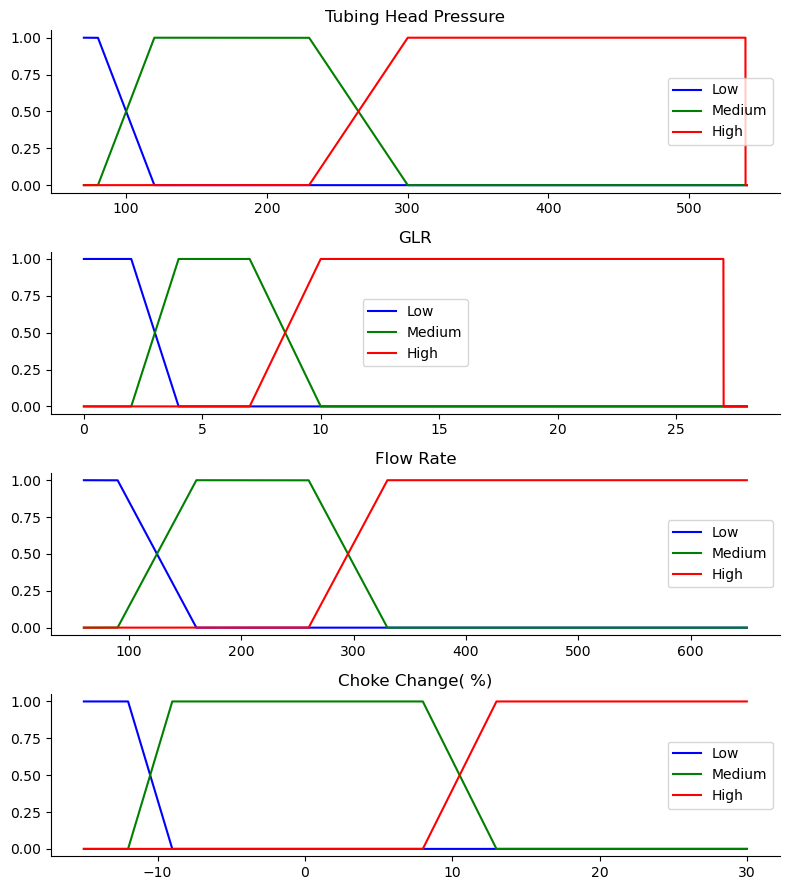

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


# Define universe variables
# Tubing Head pressure (x_THP) values range from 70 to 540 psi
# Gas Liquid ratio (x_GLR) values range from 0 to 27 Mscf/bbl
# Oil production rate (x_q) values range from 60 to 649 bbl/day
# Choke Adjustment values (x_choke) range from -15 to 30 percentage change
x_THP = np.arange(70, 541, 0.01)
x_GLR = np.arange(0, 28, 0.01)
x_q = np.arange(60, 650, 0.01)
x_choke = np.arange(-15, 30, 0.01)


# Create trapezoidal fuzzy membership functions for low, medium, and
# high linguistic variables.
THP_low = fuzz.trapmf(x_THP, [70, 70, 80, 120])
THP_med = fuzz.trapmf(x_THP, [80, 120, 230, 300])
THP_hi = fuzz.trapmf(x_THP, [230, 300, 540, 540])
GLR_low = fuzz.trapmf(x_GLR, [0, 0, 2, 4])
GLR_med = fuzz.trapmf(x_GLR, [2, 4, 7, 10])
GLR_hi = fuzz.trapmf(x_GLR, [7, 10, 27, 27])
q_low = fuzz.trapmf(x_q, [60, 60, 90, 160])
q_med = fuzz.trapmf(x_q, [90, 160, 260, 330])
q_hi = fuzz.trapmf(x_q, [260, 330, 650, 650])
choke_increase = fuzz.trapmf(x_choke,[-15, -15, -12,-9])
choke_fixed = fuzz.trapmf(x_choke, [-12, -9, 8,13])
choke_decrease = fuzz.trapmf(x_choke, [8,13, 30,30])


# Plot value ranges and the trapezoidal membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 4, figsize = (8, 9))
ax0.plot(x_THP, THP_low, 'b', linewidth = 1.5, label = 'Low')
ax0.plot(x_THP, THP_med, 'g', linewidth = 1.5, label = 'Medium')
ax0.plot(x_THP, THP_hi, 'r', linewidth = 1.5, label = 'High')
ax0.set_title('Tubing Head Pressure')
ax0.legend()

ax1.plot(x_GLR, GLR_low, 'b', linewidth = 1.5, label = 'Low')
ax1.plot(x_GLR, GLR_med, 'g', linewidth = 1.5, label = 'Medium')
ax1.plot(x_GLR, GLR_hi, 'r', linewidth = 1.5, label = 'High')
ax1.set_title('GLR')
ax1.legend()

ax2.plot(x_q, q_low, 'b', linewidth = 1.5, label = 'Low')
ax2.plot(x_q, q_med, 'g', linewidth = 1.5, label = 'Medium')
ax2.plot(x_q, q_hi, 'r', linewidth = 1.5, label = 'High')
ax2.set_title('Flow Rate')
ax2.legend()

ax3.plot(x_choke, choke_increase, 'b', linewidth = 1.5, label = 'Low')
ax3.plot(x_choke, choke_fixed, 'g', linewidth = 1.5, label = 'Medium')
ax3.plot(x_choke, choke_decrease, 'r', linewidth = 1.5, label = 'High')
ax3.set_title('Choke Change( %)')
ax3.legend()

# Not Showing top and right axes
for ax in (ax0, ax1, ax2,ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Step 2 - Fuzzy Rules
* The next step is to define `fuzzy rules to make a controlled
decision`, based on input variables.

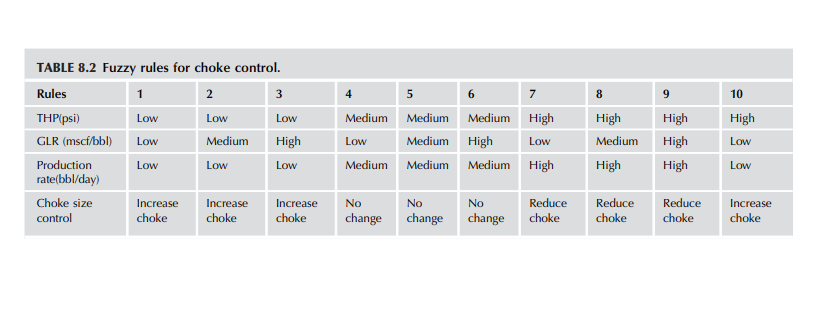

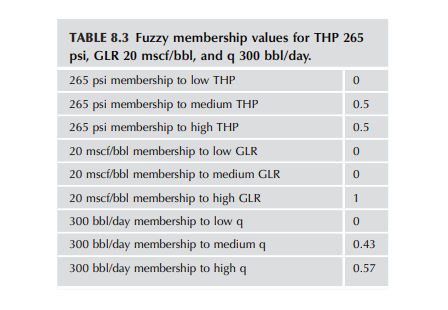

### Activating of fuzzy membership functions for THP 265 psi, GLR 20 mscf/day and q 300 bbl/day                            

In [2]:
THP_mem_lo = fuzz.interp_membership(x_THP, THP_low, 265)
THP_mem_med = fuzz.interp_membership(x_THP, THP_med, 265)
THP_mem_hi = fuzz.interp_membership(x_THP, THP_hi, 265)
GLR_mem_lo = fuzz.interp_membership(x_GLR, GLR_low, 20)
GLR_mem_med = fuzz.interp_membership(x_GLR, GLR_med, 20)
GLR_mem_hi = fuzz.interp_membership(x_GLR, GLR_hi, 20)
q_mem_lo = fuzz.interp_membership(x_q, q_low, 300)
q_mem_med = fuzz.interp_membership(x_q,q_med, 300)
q_mem_hi = fuzz.interp_membership(x_q, q_hi, 300)

# Step 3 - Inference Step
* The firing strength of all rules can be calculated.
Only rules 6 and 9 will have nonzero firing strength and hence are active.

* Let’s
see how the firing strength of rule 6 can be computed. Rule 6 states that if THP
is medium AND GLR is high AND q is medium THEN maintain the choke
size or no change in the choke (NC).

* Since AND operator is applied, minimum
value among the three input memberships should be picked to calculate the
firing strength of the rule 6.

* The minimum membership value is 0.43.

### Python codes for computing firing strengths and fuzzy aggregation are as follows:

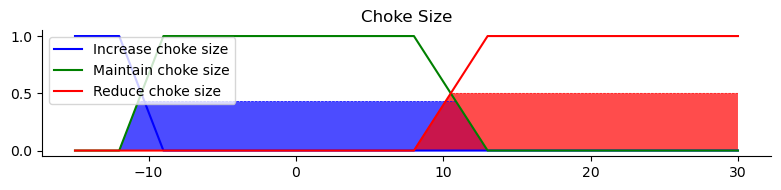

In [3]:
# Firing strength calculation for Rule 6
# If THP is medium AND GLR is high AND q is medium THEN Choke Medium
active_rule6 = np.amin([THP_mem_med, GLR_mem_hi, q_mem_med])
choke_activation_6 = np.fmin(active_rule6, choke_fixed)


# Firing strength calculation for Rule 9
# If THP is high AND GLR is high AND q is high THEN Reduce high Choke
active_rule9 = np.amin([THP_mem_hi, GLR_mem_hi, q_mem_hi])
choke_activation_9 = np.fmin(active_rule9, choke_decrease)


choke0 =  np.zeros_like(x_choke)

#Plot Membership functions for rules
fig, ax0 = plt.subplots(figsize = (8, 2))
ax0.fill_between(x_choke, choke0, choke_activation_6, facecolor = 'b', alpha=0.7)
ax0.plot(x_choke, choke_activation_6, 'b', linewidth=0.5, linestyle = '--')
ax0.fill_between(x_choke, choke0, choke_activation_9, facecolor = 'r', alpha=0.7)
ax0.plot(x_choke, choke_activation_9, 'r', linewidth = 0.5, linestyle = '--')
ax0.set_title('Output membership activity')

ax0.plot(x_choke, choke_increase, 'b', linewidth = 1.5,
         label = 'Increase choke size')
ax0.plot(x_choke, choke_fixed, 'g', linewidth = 1.5,
         label = 'Maintain choke size')
ax0.plot(x_choke, choke_decrease, 'r', linewidth = 1.5,
         label = 'Reduce choke size')
ax0.set_title('Choke Size')
ax0.legend()

# Not Showing top and right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [4]:
# Aggregate two output membership functions or firing strengths
# together
aggregated = np.fmax(choke_activation_6, choke_activation_9)

# Step 4 - Defuzzification (Decision)
* The last step of this problem is to calculate the choke control decision which helps to come up with a crisp value for the
percentage of choke change (decision variable).

10.111105475700729


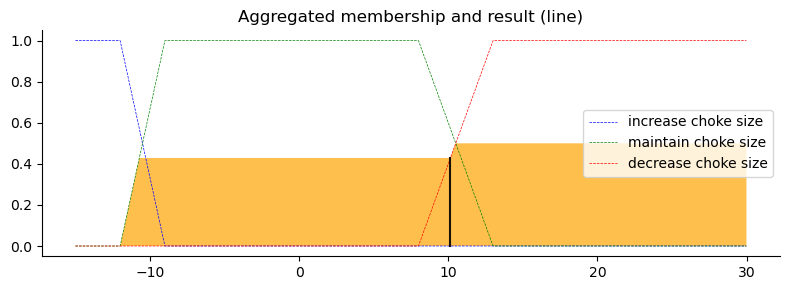

In [7]:
# compute defuzzified result using center of gravity
choke = fuzz.defuzz(x_choke, aggregated, 'centroid')
choke_activation = fuzz.interp_membership(x_choke, aggregated, choke)


# Plot the results
fig, ax0 = plt.subplots(figsize = (8, 3))
ax0.plot(x_choke, choke_increase, 'b', linewidth = 0.5, linestyle = '--',
        label = 'increase choke size')
ax0.plot(x_choke, choke_fixed, 'g', linewidth = 0.5, linestyle = '--',
        label = 'maintain choke size')
ax0.plot(x_choke, choke_decrease, 'r', linewidth = 0.5, linestyle = '--',
        label = 'decrease choke size')
ax0.fill_between(x_choke, choke0, aggregated, facecolor = 'Orange', alpha = 0.7)
ax0.plot([choke, choke], [0, choke_activation], 'k', linewidth = 1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
ax0.legend()

# Not Showing top and right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
print (choke)

# Conclusion
* Based on Fuzzy control system decision, it is necessary to `decrease the choke
by 10.1%` considering input variables for Tubing head pressure (265 psi), GLR
(20mscf/bbl), and oil flow rate (300 bbl/day).

* This problem was solved step by step
to show how fuzzy inference systems work.

Let's break down this code step by step to better understand the process of **defuzzification** and **plotting the results** in a fuzzy logic system.

---

### 1. **Defuzzification: Center of Gravity (Centroid Method)**

```python
choke = fuzz.defuzz(x_choke, aggregated, 'centroid')
choke_activation = fuzz.interp_membership(x_choke, aggregated, choke)
```

- **`fuzz.defuzz(x_choke, aggregated, 'centroid')`**:
  - **`x_choke`**: This represents the range of possible choke adjustment values (i.e., the x-axis in the fuzzy logic plot).
  - **`aggregated`**: This represents the aggregated fuzzy membership function, which is a combination of all the rule outputs after applying the fuzzy operators (AND, OR, etc.).
  - **`'centroid'`**: The defuzzification method used here is **centroid** (center of gravity). This method calculates the center of the area under the aggregated curve. The result is a **crisp value** that represents the final output decision.

- **`fuzz.interp_membership(x_choke, aggregated, choke)`**:
  - This computes the **degree of membership** of the defuzzified result (`choke`) in the aggregated fuzzy set. It returns a value between 0 and 1 that tells us how strongly the crisp result belongs to the fuzzy set.

In summary, the **defuzzified value** (`choke`) is the final output decision (e.g., the exact adjustment to the choke), and the **choke_activation** represents its corresponding membership in the aggregated fuzzy set.

---

### 2. **Plotting the Results:**

```python
fig, ax0 = plt.subplots(figsize = (8, 3))
```
- **`fig, ax0 = plt.subplots(figsize = (8, 3))`**: This creates a figure (`fig`) and an axis (`ax0`) for the plot. The `figsize=(8, 3)` sets the size of the figure to 8 inches wide and 3 inches tall.

#### a) **Plotting Individual Membership Functions:**
```python
ax0.plot(x_choke, choke_increase, 'b', linewidth = 0.5, linestyle = '--', label = 'increase choke size')
ax0.plot(x_choke, choke_fixed, 'g', linewidth = 0.5, linestyle = '--', label = 'maintain choke size')
ax0.plot(x_choke, choke_decrease, 'r', linewidth = 0.5, linestyle = '--', label = 'decrease choke size')
```

- **`ax0.plot(x_choke, choke_increase, 'b', ...)`**: This plots the **membership function** for increasing the choke size (`choke_increase`) in **blue** ('b').
- **`ax0.plot(x_choke, choke_fixed, 'g', ...)`**: This plots the **membership function** for maintaining the choke size (`choke_fixed`) in **green** ('g').
- **`ax0.plot(x_choke, choke_decrease, 'r', ...)`**: This plots the **membership function** for decreasing the choke size (`choke_decrease`) in **red** ('r').
- Each membership function is plotted with a dashed line (`linestyle='--'`) to differentiate between them visually, and the **labels** are used to identify them in the legend.

#### b) **Filling the Aggregated Area:**
```python
ax0.fill_between(x_choke, choke0, aggregated, facecolor = 'Orange', alpha = 0.7)
```
- **`ax0.fill_between(x_choke, choke0, aggregated, facecolor='Orange', alpha=0.7)`**:
  - This fills the area between the x-axis (`x_choke`) and the aggregated fuzzy membership function (`aggregated`) with an **orange color**.
  - The **`alpha = 0.7`** sets the transparency level of the fill to 70%, so the fill appears semi-transparent.

#### c) **Plotting the Defuzzified Result:**
```python
ax0.plot([choke, choke], [0, choke_activation], 'k', linewidth = 1.5, alpha=0.9)
```
- This plots a vertical **black** ('k') line at the defuzzified result (`choke`) to show the exact output value.
  - The line extends from **`y = 0`** to **`y = choke_activation`**, where **choke_activation** is the degree of membership of the defuzzified result in the aggregated set.
  - **`linewidth = 1.5`** makes the line thicker, and **`alpha = 0.9`** sets its transparency to 90%, making it almost opaque.

---

### 3. **Adding Title and Legend:**

```python
ax0.set_title('Aggregated membership and result (line)')
ax0.legend()
```
- **`ax0.set_title('Aggregated membership and result (line)')`**: Sets the title of the plot, indicating that the plot shows the aggregated membership functions and the defuzzified result.
- **`ax0.legend()`**: Adds a legend to the plot, labeling the different membership functions for **increase choke**, **maintain choke**, and **decrease choke**.

---

### 4. **Hiding Unnecessary Plot Elements:**

```python
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
```
- **`ax.spines['top'].set_visible(False)`**: Removes the top axis line to simplify the plot visually.
- **`ax.spines['right'].set_visible(False)`**: Removes the right axis line.
- **`ax.get_xaxis().tick_bottom()`**: Ensures that only the bottom x-axis has tick marks.
- **`ax.get_yaxis().tick_left()`**: Ensures that only the left y-axis has tick marks.
- **`plt.tight_layout()`**: Adjusts the layout of the plot to make sure everything fits nicely within the figure.

---

### 5. **Printing the Defuzzified Result:**

```python
print(choke)
```
- **`print(choke)`**: Prints the defuzzified result, which is the final choke adjustment value calculated using the center of gravity (centroid) method.

---

### Summary:
- The code calculates a **defuzzified** output using the **center of gravity** method.
- The plot visualizes the individual fuzzy membership functions (for increasing, maintaining, or decreasing choke size) along with the aggregated fuzzy set.
- The final **defuzzified value** (the choke adjustment) is marked on the plot with a vertical line, and the result is printed.

Let me know if you have any questions or need further explanation!

# Fuzzy Control System - Choke Adjustment

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


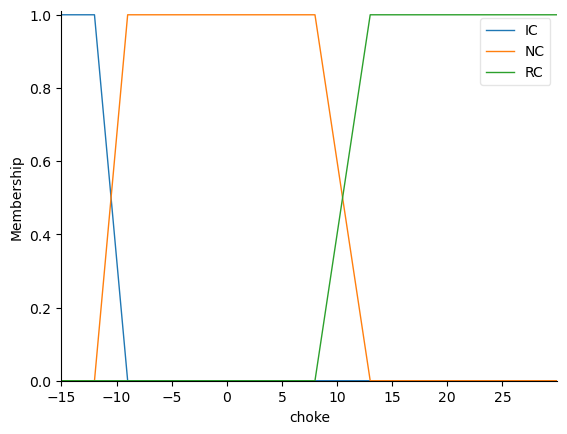

In [8]:
import numpy as np
import skfuzzy
from skfuzzy import control


# Define input variable for a fuzzy control system
THP = control.Antecedent(np.arange(70, 541, 1), 'THP')
GLR = control.Antecedent(np.arange(0, 28, 1), 'GLR')
q = control.Antecedent(np.arange(60, 650, 1), 'q')
choke = control.Consequent(np.arange(-15,30,0.01), 'choke')


# Create trapezoidal fuzzy membership functions
THP['low'] = skfuzzy.trapmf(THP.universe, [70, 70, 80, 120])
THP['med'] = skfuzzy.trapmf(THP.universe, [80, 120, 230, 300])
THP['hi'] = skfuzzy.trapmf(THP.universe, [230, 300, 540, 540])
GLR['low'] = skfuzzy.trapmf(GLR.universe, [0, 0, 2, 4])
GLR['med'] = skfuzzy.trapmf(GLR.universe, [2, 4, 7, 10])
GLR['hi'] = skfuzzy.trapmf(GLR.universe, [7, 10, 27, 27])
q['low'] = skfuzzy.trapmf(q.universe,[60, 60, 90, 160])
q['med'] = skfuzzy.trapmf(q.universe, [90, 160, 260, 330])
q['hi'] = skfuzzy.trapmf(q.universe, [260, 330, 650, 650])
choke['IC'] = skfuzzy.trapmf(choke.universe,[-15, -15, -12,-9])
choke['NC'] = skfuzzy.trapmf(choke.universe, [-12, -9, 8, 13])
choke['RC'] = skfuzzy.trapmf(choke.universe, [8,13, 30, 30])


# Plot Choke Membership Function
choke.view()

10.111101031095357


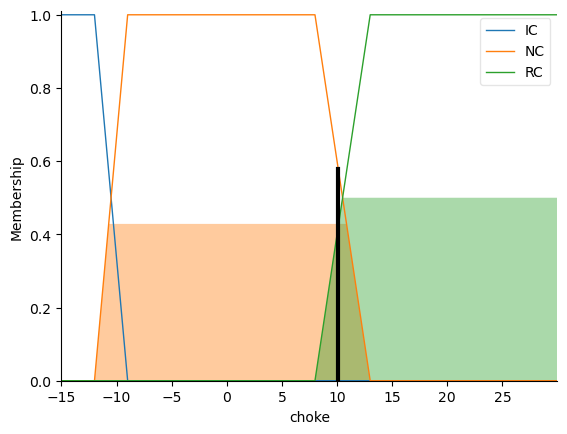

In [9]:
# Defining Rule in a fuzzy control system to connect inputs to choke
# control decision
rule1 = control.Rule(THP['low'] & GLR['low'] & q['low'], choke['IC'])
rule2 = control.Rule(THP['low'] & GLR['med'] & q['low'], choke['IC'])
rule3 = control.Rule(THP['low'] & GLR['hi'] & q['low'], choke['IC'])
rule4 = control.Rule(THP['med'] & GLR['low'] & q['med'], choke['NC'])
rule5 = control.Rule(THP['med'] & GLR['med'] & q['med'], choke['NC'])
rule6 = control.Rule(THP['med'] & GLR['hi'] & q['med'], choke['NC'])
rule7 = control.Rule(THP['hi'] & GLR['low'] & q['hi'], choke['RC'])
rule8 = control.Rule(THP['hi'] & GLR['med'] & q['hi'], choke['RC'])
rule9 = control.Rule(THP['hi'] & GLR['hi'] & q['hi'], choke['RC'])
rule10 = control.Rule(THP['hi'] & GLR['low'] & q['low'], choke['IC'])


#Additional rules for 3D plot
rule11 = control.Rule(THP['low'] & GLR['hi'] & q['hi'], choke['NC'])
rule12 = control.Rule(THP['med'] & GLR['med'] & q['low'], choke['IC'])
rule13 = control.Rule(THP['hi'] & GLR['med'] & q['low'], choke['NC'])
rule14 = control.Rule(THP['hi'] & GLR['med'] & q['med'], choke['NC'])
rule15 = control.Rule(THP['med'] & GLR['med'] & q['hi'], choke['RC'])
rule16 = control.Rule(THP['low'] & GLR['med'] & q['med'], choke['IC'])
rule17 = control.Rule(THP['low'] & GLR['med'] & q['hi'], choke['NC'])


# Define base classes for Fuzzy control system with 10 rules
choke_control = control.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                       rule6, rule7, rule8, rule9, rule10,
                                       rule11, rule12, rule13, rule14, rule15,
                                       rule16, rule17])


#Result computing from control system
choking = control.ControlSystemSimulation(choke_control)

# Provide inputs to the ControlSystem using input
choking.input['THP'] = 265
choking.input['GLR'] = 20
choking.input['q'] = 300

#compute the result of fuzzy system
choking.compute()

print (choking.output['choke'])

#plot the rules and final decision
choke.view(sim = choking)

# Important Notice
* In order to see the `decision values for different input values`, next a 3D plot of
tubing head pressure (THP), flow rate (q), and a fixed GLR of 5 mscf/bbl can be
coded as follows:

Let's break down the logic and flow of the code step by step.

### 1. **Defining Fuzzy Rules**:
The first part of the code defines **rules** that connect the inputs (Tubing Head Pressure - THP, Gas-Liquid Ratio - GLR, and flow rate - q) to the output decision for choke control. In fuzzy logic, these rules define how the system should behave under various conditions.

```python
rule1 = control.Rule(THP['low'] & GLR['low'] & q['low'], choke['IC'])
```

This is an example of one of the rules:
- **`THP['low'] & GLR['low'] & q['low']`**: Specifies that when THP is low, GLR is low, and q is low, the output should be:
- **`choke['IC']`**: Set the choke to the "IC" state, which might represent "Increase Choke".

There are **17 rules** in total, each combining different conditions of the input variables to determine the choke control state.

### 2. **What each input and output means**:
- **`THP`**: Tubing Head Pressure, which can be "low," "medium," or "high."
- **`GLR`**: Gas-Liquid Ratio, also having fuzzy categories like "low," "medium," and "high."
- **`q`**: Flow rate (q), which is also categorized as "low," "medium," or "high."
- **`choke`**: The output choke decision, which could be **IC** (Increase Choke), **NC** (No Change), or **RC** (Reduce Choke).

### 3. **Defining the Control System**:

```python
choke_control = control.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                       rule6, rule7, rule8, rule9, rule10,
                                       rule11, rule12, rule13, rule14, rule15,
                                       rule16, rule17])
```

This part of the code sets up a **fuzzy control system** by combining all the rules that were defined. The control system will use these rules to make decisions based on the input values of THP, GLR, and q.

### 4. **Simulating the Control System**:

```python
choking = control.ControlSystemSimulation(choke_control)
```

This creates a **simulation** object, `choking`, which will use the fuzzy control system (`choke_control`) to compute choke adjustments based on inputs.

### 5. **Providing Inputs to the Control System**:

```python
choking.input['THP'] = 265
choking.input['GLR'] = 20
choking.input['q'] = 300
```

Here, specific input values are given:
- **`THP = 265`**: The current Tubing Head Pressure is 265.
- **`GLR = 20`**: The current Gas-Liquid Ratio is 20.
- **`q = 300`**: The flow rate is 300.

These input values will be fuzzified, meaning they will be mapped to fuzzy sets (e.g., "low," "medium," or "high") based on how they fit into predefined membership functions for each variable.

### 6. **Computing the Result**:

```python
choking.compute()
```

This line runs the fuzzy logic engine, which applies the rules and computes the output based on the provided inputs.

### 7. **Displaying the Output**:

```python
print(choking.output['choke'])
```

After computation, the system outputs the result for **`choke`** based on the rules and inputs. This result is the final choke adjustment (e.g., whether to increase or decrease the choke).

### 8. **Visualizing the Rule Base**:

```python
choke.view(sim = choking)
```

This line will generate a plot that shows the visualization of how the rules in the control system work and how the input values affect the final decision on choke adjustment. It's a helpful way to understand the fuzzy system's behavior.

---

### Summary:
- **Rules** are defined to map input combinations (THP, GLR, q) to output decisions (choke adjustment).
- These rules are combined into a **control system**.
- Input values (THP, GLR, q) are provided to the system.
- The system **computes** the output choke decision based on these inputs.
- Finally, the result is printed, and the fuzzy system's behavior is visualized.

Text(0.5, 0, 'Choke Adjustment (-%)')

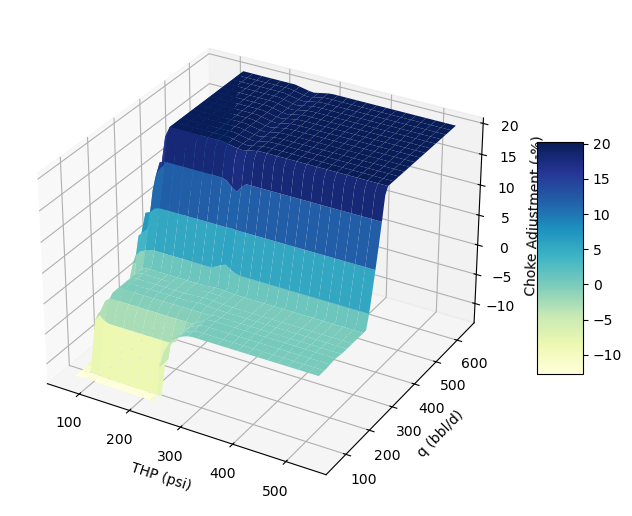

In [10]:
n = 50
THP_highres = np.linspace(70, 540, n+1)
q_highres = np.linspace(60, 640, n+1)
x, y = np.meshgrid(THP_highres, q_highres)
z = np.zeros_like(x)


# Loop through the input values to calculate the corresponding control
# values
for i in range(n+1):
    for j in range(n+1):
        choking.input['THP'] = x[i, j]
        choking.input['GLR'] = 5
        choking.input['q'] = y[i, j]
        choking.compute()
        z[i, j] = choking.output['choke']


# Plot the 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 10))

ax = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, z, cmap = 'YlGnBu', linewidth = 0.5)
fig.colorbar(surf, ax = ax, shrink = 0.3, aspect = 5)
ax.set_xlabel('THP (psi)')
ax.set_ylabel('q (bbl/d)')
ax.set_zlabel('Choke Adjustment (-%)')

Let's break down the code step-by-step to understand the logic behind it.

### 1. **Setting up input arrays:**

```python
n = 50
THP_highres = np.linspace(70, 540, n+1)
q_highres = np.linspace(60, 640, n+1)
x, y = np.meshgrid(THP_highres, q_highres)
z = np.zeros_like(x)
```

- **`n = 50`**: Defines the resolution for the grid of values. The total number of points in each dimension will be `n + 1 = 51`.
- **`THP_highres = np.linspace(70, 540, n+1)`**: Generates an array of `n+1` evenly spaced values between 70 and 540 for "THP" (Tubing Head Pressure). These values are used as the x-axis in the 3D plot.
- **`q_highres = np.linspace(60, 640, n+1)`**: Generates an array of `n+1` evenly spaced values between 60 and 640 for "q" (flow rate). These values are used as the y-axis in the 3D plot.
- **`x, y = np.meshgrid(THP_highres, q_highres)`**: Creates a 2D grid from the `THP_highres` and `q_highres` arrays, where each element of `x` and `y` corresponds to a point on the grid.
- **`z = np.zeros_like(x)`**: Initializes a zero matrix with the same shape as `x` (and `y`). This matrix will store the computed "Choke Adjustment" values, which will be plotted on the z-axis.

---

### 2. **Loop through the input values and compute choke adjustments:**

```python
for i in range(n+1):
    for j in range(n+1):
        choking.input['THP'] = x[i, j]
        choking.input['GLR'] = 5
        choking.input['q'] = y[i, j]
        choking.compute()
        z[i, j] = choking.output['choke']
```

- **Nested loops**: 
  - **`for i in range(n+1)`**: Outer loop iterates over the rows of the grid (THP values).
  - **`for j in range(n+1)`**: Inner loop iterates over the columns of the grid (flow rate values).
  
- **Assigning inputs to the fuzzy system**:
  - **`choking.input['THP'] = x[i, j]`**: Sets the current "THP" value from the `x` grid (based on the current iteration indices `i` and `j`).
  - **`choking.input['GLR'] = 5`**: Sets the Gas-Liquid Ratio (GLR) to 5. This value is constant for this example.
  - **`choking.input['q'] = y[i, j]`**: Sets the current flow rate value from the `y` grid.

- **`choking.compute()`**: Executes the fuzzy logic system to compute the output based on the inputs (THP, GLR, q). This is where the fuzzy logic system determines the "Choke Adjustment" for the given conditions.

- **`z[i, j] = choking.output['choke']`**: Stores the computed "Choke Adjustment" (from the `choking.output['choke']`) in the corresponding position in the `z` matrix.

---

### 3. **3D Plotting the surface:**

```python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 10))

ax = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, z, cmap = 'YlGnBu', linewidth = 0.5)
fig.colorbar(surf, ax = ax, shrink = 0.3, aspect = 5)
ax.set_xlabel('THP (psi)')
ax.set_ylabel('q (bbl/d)')
ax.set_zlabel('Choke Adjustment (-%)')
```

- **`plt.figure(figsize=(8, 10))`**: Creates a new figure with a specified size (8 inches wide, 10 inches tall).
- **`fig.add_subplot(111, projection='3d')`**: Adds a 3D subplot to the figure. `111` indicates that there will be only one plot (1 row, 1 column).
- **`ax.plot_surface(x, y, z, cmap='YlGnBu', linewidth=0.5)`**: Creates a 3D surface plot with the computed values:
  - **`x`**: THP values (x-axis).
  - **`y`**: Flow rate values (y-axis).
  - **`z`**: Choke adjustment values (z-axis).
  - **`cmap='YlGnBu'`**: Specifies the color map (Yellow-Green-Blue) for coloring the surface.
  - **`linewidth=0.5`**: Sets the line width between grid points on the surface.
  
- **`fig.colorbar(surf, ax=ax, shrink=0.3, aspect=5)`**: Adds a color bar to the plot, which visually represents the magnitude of the `z` values (choke adjustments). The `shrink` and `aspect` parameters control the size and aspect ratio of the color bar.
  
- **`ax.set_xlabel('THP (psi)')`**: Sets the label for the x-axis (THP, in psi).
- **`ax.set_ylabel('q (bbl/d)')`**: Sets the label for the y-axis (flow rate, in barrels per day).
- **`ax.set_zlabel('Choke Adjustment (-%)')`**: Sets the label for the z-axis (choke adjustment, as a percentage reduction).

---

### Summary of the Process:
- A grid of THP (Tubing Head Pressure) and flow rate values is created.
- For each point on this grid, the fuzzy logic system computes a choke adjustment based on the inputs.
- A 3D surface plot is generated to visualize how the choke adjustment varies across different combinations of THP and flow rate, with a fixed GLR value of 5.

Let me know if you'd like further clarification or help with anything else!

# Fuzzy C-means clustering

# Step 1 - Preparing the Data
* It is also worth mentioning that typically, there is
a logarithmic trend in permeability versus porosity

*  Therefore, permeability
values should be used in logarithmic scales.

Text(0, 0.5, 'Permeability')

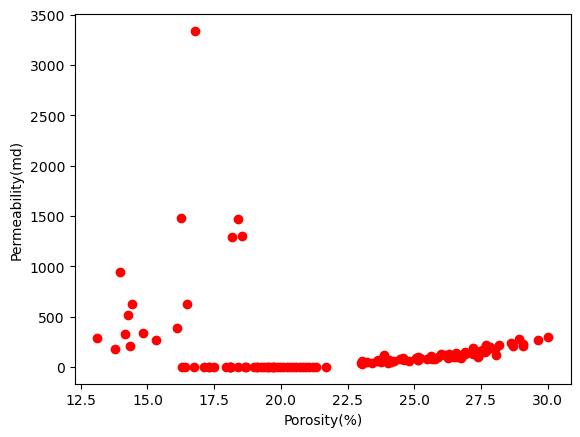

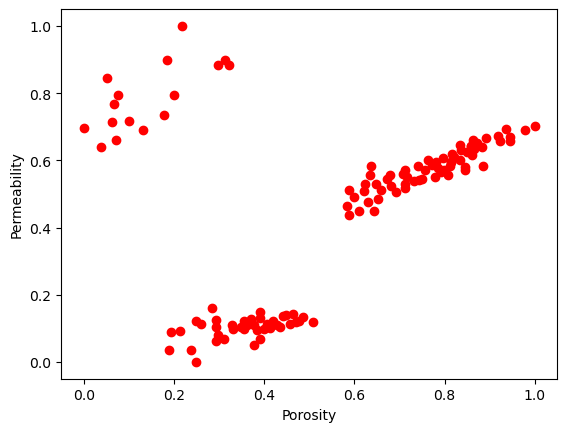

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy
import math


#Specify colors for different classes
colors = ['b', 'grey', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'purple']

#import Dataset and change permeability to log-scale
dataset = pd.read_csv('Chapter8_Fuzzy_Clustering_Porosity_Permeability.csv')

ds_log = pd.DataFrame.copy(dataset)
ds_log['Permeability'] = ds_log['Permeability'].apply(math.log10)


# Scale the data from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ds_log)
ds_log_scaled = scaler.transform(ds_log)


#Transpose Scaled data for Fuzzy Cluster Algorithm
ds_log_scaled = ds_log_scaled.T


#Plot permeability vs porosity
plt.figure()
plt.plot(dataset['Porosity'], dataset['Permeability'],'ro')
plt.xlabel('Porosity(%)')
plt.ylabel('Permeability(md)')

#Plot permeability vs porosity with scaled data
plt.figure()
plt.plot(ds_log_scaled[0,:], ds_log_scaled[1,:],'ro')
plt.xlabel('Porosity')
plt.ylabel('Permeability')

Let's break this code down step-by-step to explain each section clearly.

### 1. **Importing necessary libraries:**

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy
import math
```

- **`pandas` (`pd`)**: Used for data manipulation and analysis. It helps load the dataset and apply transformations.
- **`numpy` (`np`)**: Handles numerical computations and array manipulations.
- **`matplotlib.pyplot` (`plt`)**: Used for plotting and visualization.
- **`skfuzzy`**: Provides functions for fuzzy logic and clustering algorithms (specifically fuzzy c-means).
- **`math`**: Used for basic mathematical operations like logarithms.

---

### 2. **Specify colors for different classes:**

```python
colors = ['b', 'grey', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'purple']
```

- **`colors`**: A list of 10 different colors (represented by color codes) used to visualize different clusters later.

---

### 3. **Loading and transforming the dataset:**

```python
dataset = pd.read_csv('Chapter8_Fuzzy_Clustering_Porosity_Permeability.csv')
```

- **`pd.read_csv()`**: Loads the dataset from a CSV file called `'Chapter8_Fuzzy_Clustering_Porosity_Permeability.csv'` into a pandas DataFrame.
- **`dataset`**: A pandas DataFrame that contains the data from the CSV file. It likely includes columns for "Porosity" and "Permeability."

---

### 4. **Apply log transformation to the permeability data:**

```python
ds_log = pd.DataFrame.copy(dataset)
ds_log['Permeability'] = ds_log['Permeability'].apply(math.log10)
```

- **`ds_log = pd.DataFrame.copy(dataset)`**: Creates a copy of the `dataset` DataFrame to prevent modifying the original data.
- **`ds_log['Permeability'].apply(math.log10)`**: Applies a base-10 logarithmic transformation to the "Permeability" column. This is done to reduce skewness in the data, making it easier for clustering algorithms to handle.

---

### 5. **Scale the data using Min-Max scaling:**

```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ds_log)
ds_log_scaled = scaler.transform(ds_log)
```

- **`MinMaxScaler()`**: A scaling method from `sklearn` that normalizes the data to a range between 0 and 1. Scaling ensures that features with different units or scales are brought to the same range, which is important for many machine learning algorithms.
- **`scaler.fit(ds_log)`**: Computes the minimum and maximum values for each column in the `ds_log` DataFrame.
- **`ds_log_scaled = scaler.transform(ds_log)`**: Transforms the log-scaled data (permeability and porosity) to a scale between 0 and 1 using the computed min and max values. The result, `ds_log_scaled`, is a NumPy array.

---

### 6. **Transpose the scaled data for clustering:**

```python
ds_log_scaled = ds_log_scaled.T
```

- **`ds_log_scaled.T`**: Transposes the scaled data. This changes the shape of the array so that features are rows and samples (data points) are columns. Fuzzy c-means clustering expects data in this format where each row is a feature (Porosity, Permeability), and each column represents a data point.

---

### 7. **Plotting Permeability vs. Porosity (Original Data):**

```python
plt.figure()
plt.plot(dataset['Porosity'], dataset['Permeability'],'ro')
plt.xlabel('Porosity(%)')
plt.ylabel('Permeability(md)')
```

- **`plt.figure()`**: Creates a new figure for the plot.
- **`plt.plot(dataset['Porosity'], dataset['Permeability'],'ro')`**: Plots the original "Porosity" vs. "Permeability" data from the dataset in red circles (`'ro'`). The x-axis represents Porosity, and the y-axis represents Permeability.
- **`plt.xlabel('Porosity(%)')`**: Labels the x-axis as "Porosity (%)".
- **`plt.ylabel('Permeability(md)')`**: Labels the y-axis as "Permeability (md)" (where "md" represents millidarcies, a common unit for permeability).

---

### 8. **Plotting Permeability vs. Porosity (Scaled Data):**

```python
plt.figure()
plt.plot(ds_log_scaled[0,:], ds_log_scaled[1,:],'ro')
plt.xlabel('Porosity')
plt.ylabel('Permeability')
```

- **`plt.figure()`**: Creates a new figure for the scaled data plot.
- **`plt.plot(ds_log_scaled[0, :], ds_log_scaled[1, :], 'ro')`**: Plots the scaled data where:
  - **`ds_log_scaled[0, :]`**: Represents the scaled values of "Porosity" (since the first row of the transposed data is Porosity).
  - **`ds_log_scaled[1, :]`**: Represents the scaled values of "Permeability" (since the second row is Permeability).
- **`plt.xlabel('Porosity')`**: Labels the x-axis as "Porosity" (scaled data).
- **`plt.ylabel('Permeability')`**: Labels the y-axis as "Permeability" (scaled data).

---

### Summary of the Process:
- **Data Import and Preparation**:
  - The dataset is loaded, and a log transformation is applied to the "Permeability" column.
  - The transformed data is scaled between 0 and 1 using Min-Max scaling to normalize the features.
  
- **Visualization**:
  - Two plots are created: 
    1. A plot of the original (unscaled) Porosity vs. Permeability data.
    2. A plot of the scaled data (after logarithmic transformation and normalization).

Let me know if you need further clarification on any of the steps!

# Step 2 - Fuzzy C-means Clustering
* Several for loops would be
used to vary number of clusters from 2 to 9 by changing the number of centroids, training the algorithm, and visualizing the results.

* The following Python code performs fuzzy c-means clustering and visualizations:

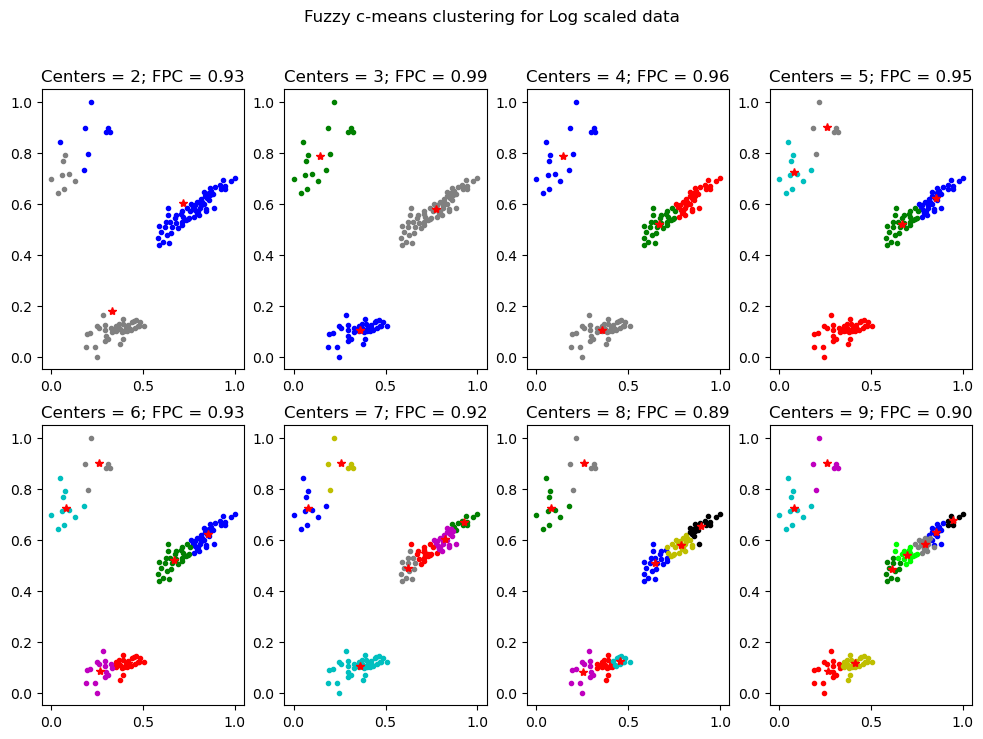

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy
seed = 50
np.random.seed(seed)

colors = ['b', 'grey', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'purple']

fig1, axes1 = plt.subplots(2, 4, figsize=(12, 8))
fig1.suptitle('Fuzzy c-means clustering for Log scaled data')
fpcs = []
n = 2

for ax in axes1.reshape(-1):
    # Perform fuzzy c-means clustering
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(
        ds_log_scaled, n, 1.5, error=0.001, maxiter=500, init=None)

    # Plotting defined classes, for each data point in the dataset
    cluster_membership = np.argmax(u, axis=0)

    for i in range(n):
        ax.plot(ds_log_scaled[0, :][cluster_membership == i],
                ds_log_scaled[1, :][cluster_membership == i], '.',
                color=colors[i])

    # Mark the centroid for each class
    for x in cntr:
        ax.plot(x[0], x[1], 'r*')

    ax.set_title(f'Centers = {n}; FPC = {fpc:.2f}')

    # Fuzzy partition coefficient storing
    fpcs.append(fpc)
    n += 1




### 1. **Importing necessary libraries and setting the random seed:**

```python
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy
seed = 50
np.random.seed(seed)
```

- **`numpy` (`np`)**: Used for array manipulation and handling numerical computations.
- **`matplotlib.pyplot` (`plt`)**: Handles plotting and visualization.
- **`skfuzzy`**: A Python library for fuzzy logic, used here for the fuzzy c-means algorithm.
- **`np.random.seed(seed)`**: Sets the random seed to ensure reproducibility of results.

---

### 2. **Defining plot settings and other variables:**

```python
colors = ['b', 'grey', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'purple']

fig1, axes1 = plt.subplots(2, 4, figsize=(12, 8))
fig1.suptitle('Fuzzy c-means clustering for Log scaled data')
fpcs = []
n = 2
```

- **`colors`**: A list of colors used for plotting clusters.
- **`plt.subplots(2, 4, figsize=(12, 8))`**: Creates a grid of 2x4 subplots for a total of 8 subplots, with a figure size of 12 inches by 8 inches. Each subplot will display one clustering result.
- **`fig1.suptitle`**: Sets a common title for the entire figure.
- **`fpcs`**: An empty list to store the fuzzy partition coefficient (FPC) values. FPC is a measure of clustering quality; values closer to 1 indicate better clustering.
- **`n = 2`**: Initializes the number of clusters to start with. In this case, it starts with 2 clusters.

---

### 3. **Main loop for clustering and plotting:**

```python
for ax in axes1.reshape(-1):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(
        ds_log_scaled, n, 1.5, error=0.001, maxiter=500, init=None
    )
```

- **`for ax in axes1.reshape(-1)`**: Loops over each subplot (`ax`). The `reshape(-1)` flattens the grid of subplots into a single array of subplots, so it can iterate over each subplot one by one.
- **`skfuzzy.cluster.cmeans()`**: Performs fuzzy c-means clustering. 
  - **`ds_log_scaled`**: The dataset you're clustering (you already have this prepared).
  - **`n`**: Number of clusters (it starts with 2, and increases in each iteration).
  - **`1.5`**: Fuzziness parameter, controlling how fuzzy the membership assignments are.
  - **`error=0.001`**: Stopping criterion for clustering; the algorithm stops when the difference between iterations is smaller than 0.001.
  - **`maxiter=500`**: Maximum number of iterations for the algorithm.
  - **`init=None`**: Random initialization of cluster centers.
  - The function returns several values:
    - **`cntr`**: The coordinates of the cluster centers.
    - **`u`**: The membership matrix, where each data point has a membership value for each cluster.
    - **`u0`**: Initial fuzzy membership matrix (not used directly here).
    - **`d`**: Distance matrix between data points and cluster centers (not used directly here).
    - **`jm`**: Objective function (not used here).
    - **`p`**: Number of iterations until convergence (not used directly here).
    - **`fpc`**: Fuzzy partition coefficient, a measure of how well the data is clustered.

---

### 4. **Plotting the clustered data:**

```python
    cluster_membership = np.argmax(u, axis=0)

    for i in range(n):
        ax.plot(ds_log_scaled[0, :][cluster_membership == i],
                ds_log_scaled[1, :][cluster_membership == i], '.',
                color=colors[i])
```

- **`cluster_membership = np.argmax(u, axis=0)`**: For each data point, finds the cluster with the highest membership value, effectively assigning each point to the most likely cluster.
- **`for i in range(n)`**: Loops over each cluster to plot its points.
- **`ax.plot()`**: Plots the data points that belong to each cluster in different colors.
  - **`ds_log_scaled[0, :]`**: X-coordinates (first feature) of the data points.
  - **`ds_log_scaled[1, :]`**: Y-coordinates (second feature) of the data points.
  - **`cluster_membership == i`**: Filters the points that belong to the current cluster `i`.
  - **`color=colors[i]`**: Uses the corresponding color for each cluster.

---

### 5. **Plotting the centroids:**

```python
    for x in cntr:
        ax.plot(x[0], x[1], 'r*')
```

- **`for x in cntr`**: Loops over the cluster centers.
- **`ax.plot(x[0], x[1], 'r*')`**: Plots the cluster center (centroid) using a red star (`'r*'`).

---

### 6. **Setting titles and storing FPC values:**

```python
    ax.set_title(f'Centers = {n}; FPC = {fpc:.2f}')
    fpcs.append(fpc)
    n += 1
```

- **`ax.set_title()`**: Sets the title for each subplot, showing the number of centers (clusters) and the FPC value rounded to 2 decimal places.
- **`fpcs.append(fpc)`**: Stores the FPC value for the current clustering run into the `fpcs` list.
- **`n += 1`**: Increases the number of clusters for the next iteration.

---

### Summary of the Process:
- The script creates a figure with 8 subplots and performs fuzzy c-means clustering on the dataset `ds_log_scaled`.
- For each subplot, the number of clusters starts from 2 and increases by 1 in each iteration.
- It plots the data points assigned to each cluster, colors them, and marks the centroids.
- The fuzzy partition coefficient (FPC) is calculated and stored to evaluate the clustering quality.
- The plot titles indicate the number of clusters and the FPC value for each subplot.

Let me know if you'd like any part clarified further!

Text(0, 0.5, 'Fuzzy Partition Coefficient(FCP)')

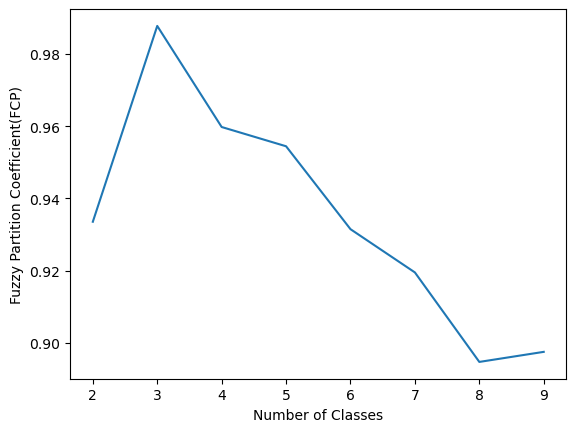

In [23]:
#Plot fuzzy partition coefficient vs number of classes
plt.plot(np.arange(2,10), fpcs)
plt.xlabel("Number of Classes")
plt.ylabel("Fuzzy Partition Coefficient(FCP)")

# Important Notice
* As illustrated in Fig. 8.28, when the number of classes increases from 2 to
3, fuzzy partition coefficient also reaches the maximum value of 0.99.

* When
the number of classes increases to values higher than 3, the fuzzy partition
coefficient starts decreasing.

* This means that based on this particular porosity/
permeability data set, the `optimum number of classes or rock types is 3`.